In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# List of tech stock tickers
tech_stocks = ['AAPL', 'MSFT', 'AMZN', 'NVDA', 'ROKU']

Appletraindf=yf.download('AAPL',start='2014-08-06',end='2019-08-06')
Appletraindf.info()




[*********************100%%**********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2014-08-06 to 2019-08-05
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 165ms/step - loss: 0.1296 - val_loss: 0.0202
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 0.0149 - val_loss: 0.0081
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 0.0095 - val_loss: 0.0057
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - loss: 0.0079 - val_loss: 0.0048
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 0.0077 - val_loss: 0.0049
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 138ms/step - loss: 0.0084 - val_loss: 0.0043
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - loss: 0.0065 - val_loss: 0.0039
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.0060 - val_loss: 0.0029
Epoch 9/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0056 - val_loss: 0.0032
Epoch 10/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 0.0053 - val_loss: 0.0028
Epoch 11/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - loss: 0.0066 - val_loss: 0.0030
Epoch 12/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms

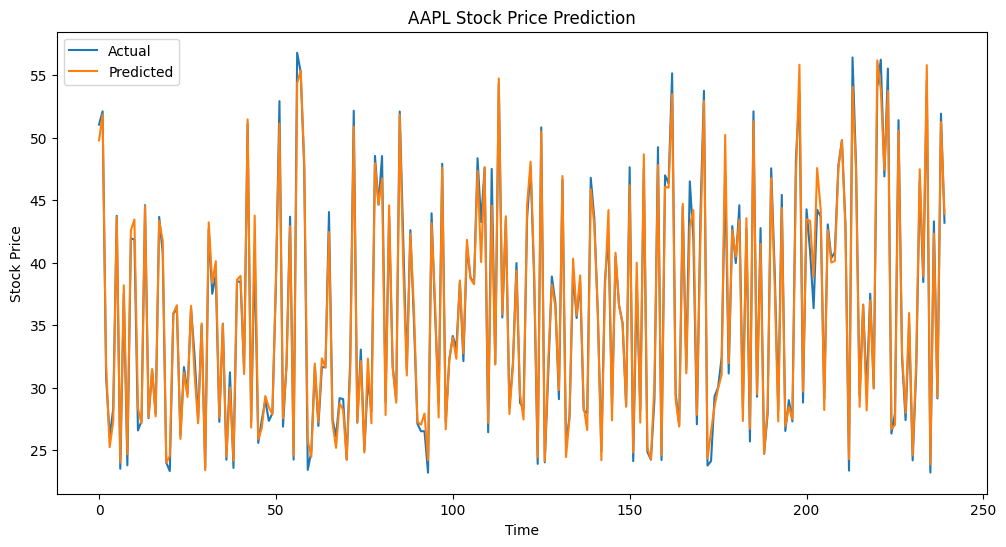

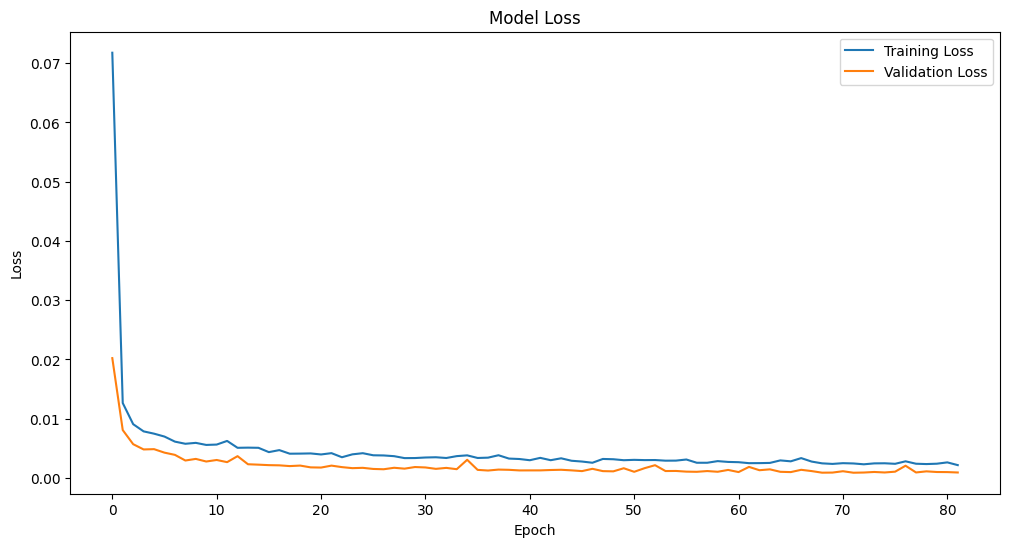

In [2]:
# With Tutor

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Download Apple stock data
Appledf = yf.download('AAPL', start='2014-08-06', end='2019-08-06')

# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(Appledf['Close'].values.reshape(-1, 1))

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

sequence_length = 60
X, y = create_sequences(scaled_data, sequence_length)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input for LSTM [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the improved LSTM model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1), activation='relu'),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True, activation='relu'),
    Dropout(0.2),
    LSTM(units=50, activation='relu'),
    Dropout(0.2),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stopping],
    verbose=1
)

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [3]:
Appletestdf=yf.download('AAPL',start='2019-08-06',end='2024-08-06')
Appletestdf.info()

[*********************100%%**********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2019-08-06 to 2024-08-05
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


In [4]:
Microsofttraindf=yf.download('MSFT',start='2014-08-06',end='2019-08-06')
Microsofttestdf=yf.download('MSFT',start='2019-08-06',end='2024-08-06')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [5]:
Amazontraindf=yf.download('AMZN',start='2014-08-06',end='2019-08-06')
Amazontestdf=yf.download('AMZN',start='2019-08-06',end='2024-08-06')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [6]:
Nvidiatraindf=yf.download('NVDA',start='2014-08-06',end='2019-08-06')
Nvidiatestdf=yf.download('NVDA',start='2019-08-06',end='2024-08-06')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [7]:
Rokutraindf=yf.download('ROKU',start='2014-08-06',end='2019-08-06')
Rokutestdf=yf.download('ROKU',start='2019-08-06',end='2024-08-06')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [8]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [9]:
Appletraindf.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-08-06,23.687500,23.870001,23.677500,23.740000,20.974585,154232000
2014-08-07,23.732500,23.987499,23.525000,23.620001,20.972374,186844000
2014-08-08,23.565001,23.705000,23.320000,23.684999,21.030088,167460000
2014-08-11,23.817499,24.020000,23.709999,23.997499,21.307552,146340000
2014-08-12,24.010000,24.219999,23.902500,23.992500,21.303108,135180000


In [10]:
Appletraindf.drop(["Adj Close"],axis=1,inplace=True)

In [11]:
Appletraindf.head()

,Open,High,Low,Close,Volume
Date,,,,,
2014-08-06,23.687500,23.870001,23.677500,23.740000,154232000
2014-08-07,23.732500,23.987499,23.525000,23.620001,186844000
2014-08-08,23.565001,23.705000,23.320000,23.684999,167460000
2014-08-11,23.817499,24.020000,23.709999,23.997499,146340000
2014-08-12,24.010000,24.219999,23.902500,23.992500,135180000


In [12]:


Appletraindf.reset_index(inplace=True)
Appletraindf.head()


,Date,Open,High,Low,Close,Volume
0,2014-08-06,23.687500,23.870001,23.677500,23.740000,154232000
1,2014-08-07,23.732500,23.987499,23.525000,23.620001,186844000
2,2014-08-08,23.565001,23.705000,23.320000,23.684999,167460000
3,2014-08-11,23.817499,24.020000,23.709999,23.997499,146340000
4,2014-08-12,24.010000,24.219999,23.902500,23.992500,135180000


In [13]:
appletrain=Appletraindf.iloc[:,4:5].values
scaler=MinMaxScaler(feature_range=(0,1))
appletrain=scaler.fit_transform(appletrain)
appletrain.shape

(1258, 1)

In [14]:
X_train= []
Y_train= []
for i in range(60,1258):
    X_train.append(appletrain[i-60:i,0])
    Y_train.append(appletrain[i,0])
X_train,Y_train=np.array(X_train),np.array(Y_train)

In [15]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1198, 60, 1)

In [16]:
model= Sequential()

model.add(LSTM(units=100,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100))
model.add(Dropout(0.2))

model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,Y_train,epochs=100,batch_size=32)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 14s 180ms/step - loss: 0.0564
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 224ms/step - loss: 0.0050
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 202ms/step - loss: 0.0055
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 186ms/step - loss: 0.0039
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 220ms/step - loss: 0.0037
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 174ms/step - loss: 0.0030
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 174ms/step - loss: 0.0043
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 187ms/step - loss: 0.0028
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 219ms/step - loss: 0.0031
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 198ms/step - loss: 0.0027
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 176ms/step - loss: 0.0034
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 174ms/step - loss: 0.0026
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 205ms/step - loss: 0.0023
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 218ms/step - loss: 0.0026
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━

In [17]:
Appletestdf.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-08-06,49.077499,49.517502,48.509998,49.250000,47.476086,143299200
2019-08-07,48.852501,49.889999,48.455002,49.759998,47.967720,133457600
2019-08-08,50.049999,50.882500,49.847500,50.857498,49.025684,108038000
2019-08-09,50.325001,50.689999,49.822498,50.247501,48.621689,98478800
2019-08-12,49.904999,50.512501,49.787498,50.119999,48.498318,89927600


In [18]:

appletest=Appletestdf.iloc[:,4:5].values
y_test=appletest[60:,0:]
inputClosing=appletest[:,0:]
inputClosing_scaled=scaler.transform(inputClosing)
inputClosing_scaled.shape
X_test=[]
length=len(appletest)
for i in range(60,length):
    X_test.append(inputClosing_scaled[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(1198, 60, 1)

In [19]:
y_pred=model.predict(X_test)
predicted=scaler.inverse_transform(y_pred)

38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step


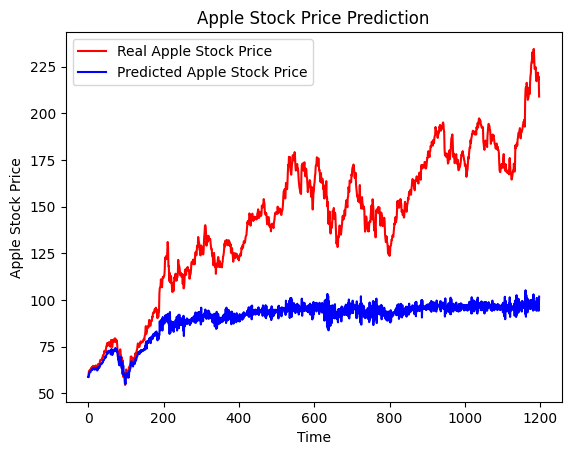

In [20]:
plt.plot(y_test,color='red',label='Real Apple Stock Price')
plt.plot(predicted,color='blue',label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In [23]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predicted)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predicted)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 3687.354156963079
Root Mean Squared Error (RMSE): 60.72358814301967
Mean Absolute Error (MAE): 52.565565134726704


In [ ]:
# Interpretations: Model NOT GOOD
# MSE: High= average of squares of the errors between predicted and actual. large disparity between predicted and actual
#RMSE: square root of MSE, putting error in same unit as stock price. on average model is $60.72 off
#MAE: Measures the average magnitude of errors in a set of predictions without considering directions. 52.57 dollars away from actual


In [27]:
# Attempt 2
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1, kernel_regularizer='l2'))

model.compile(optimizer='adam', loss='mean_squared_error')


# Train the model
model.fit(X_train, Y_train, epochs=50, batch_size=16)


Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 0.0526
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - loss: 0.0208
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0163
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0115
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - loss: 0.0090
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.0074
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - loss: 0.0061
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0057
Epoch 9/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0049
Epoch 10/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - loss: 0.0041
Epoch 11/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0039
Epoch 12/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0034
Epoch 13/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0034
Epoch 14/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.0032
Epoch 15/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0029
Epoc

[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 172ms/step - loss: 0.5833 - val_loss: 0.2214 - learning_rate: 0.0010
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 165ms/step - loss: 0.1746 - val_loss: 0.0667 - learning_rate: 0.0010
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 163ms/step - loss: 0.0553 - val_loss: 0.0192 - learning_rate: 0.0010
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 22s 180ms/step - loss: 0.0196 - val_loss: 0.0077 - learning_rate: 0.0010
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 19s 163ms/step - loss: 0.0099 - val_loss: 0.0033 - learning_rate: 0.0010
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 163ms/step - loss: 0.0073 - val_loss: 0.0036 - learning_rate: 0.0010
Epoch 7/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 162ms/step - loss: 0.0060 - val_loss: 0.0017 - learning_rate: 0.0010
Epoch 8/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 21s 163ms/step - loss: 0.0057 - val_loss: 0.0026 - learning_rate: 0.0010
Epoch 9/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 161ms/step - loss: 0.0050 - val_loss: 0.0013 - learning_rate:

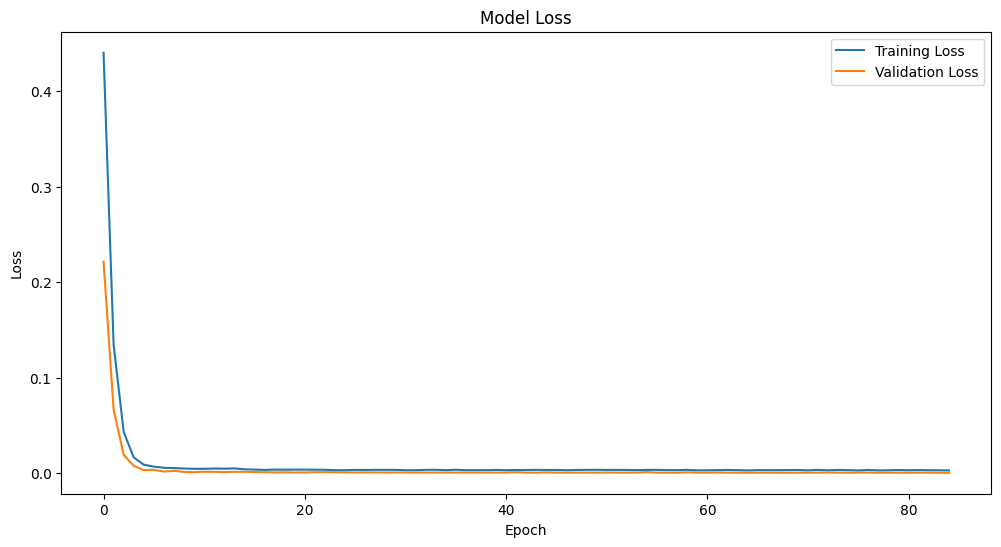

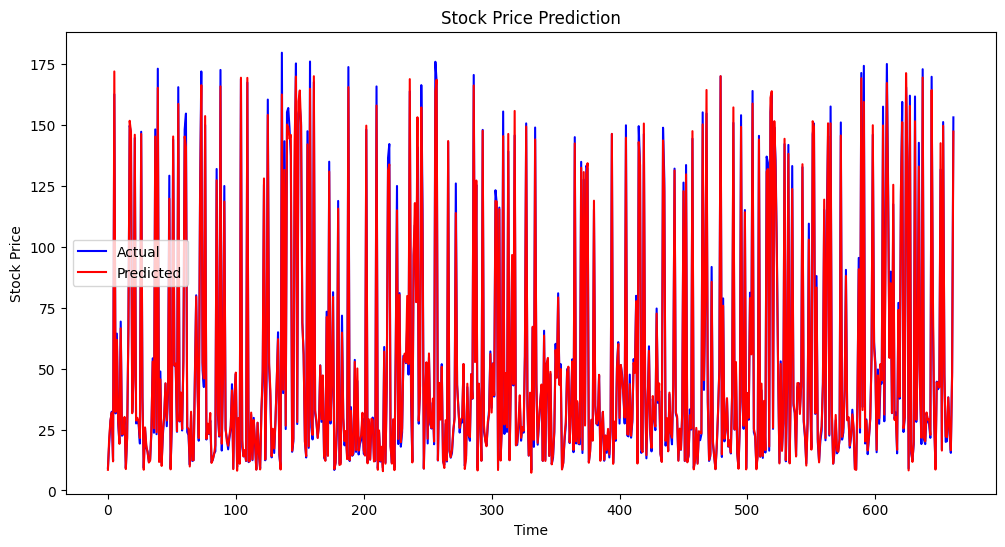

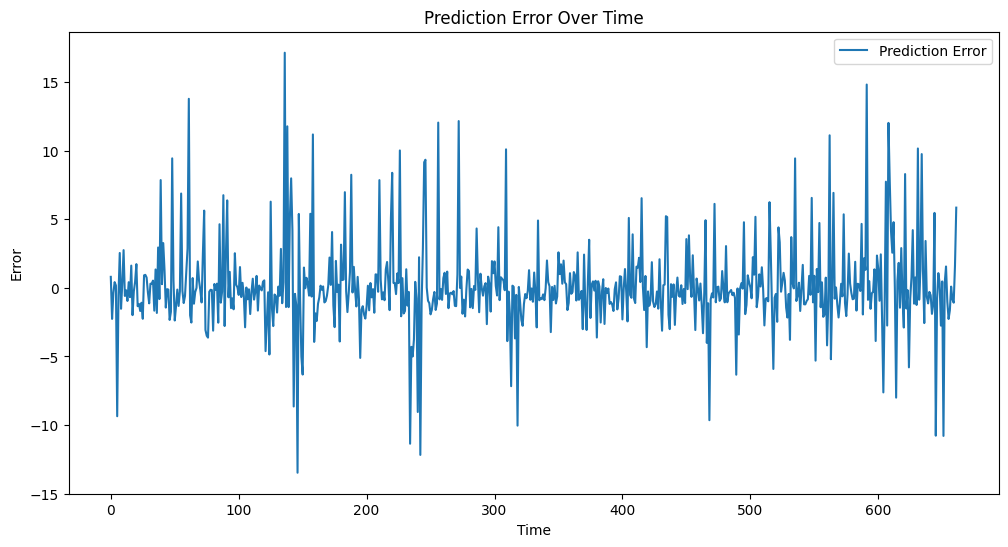

In [4]:
# With help of Tutor
#USE THIS Model and all this CODE With the other 4 Stocks to train and Test the other stocks. This code will give visualizations and metrics for the accuracy of the model on that stock.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

# Load the data
ticker = "AAPL"  # You can change this to any stock ticker
start_date = "2010-01-01"
end_date = "2023-05-24"  # Update this to the current date

df = yf.download(ticker, start=start_date, end=end_date)

# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

sequence_length = 60  # You can adjust this
X, y = create_sequences(scaled_data, sequence_length)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input for LSTM [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the improved model
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], 1), activation='relu', recurrent_dropout=0.2),
    LSTM(100, return_sequences=True, activation='relu', recurrent_dropout=0.2),
    LSTM(100, activation='relu', recurrent_dropout=0.2),
    Dense(50, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(1)
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2) Score: {r2}")

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot predictions vs actual
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Plot prediction error
plt.figure(figsize=(12, 6))
error = y_test - y_pred
plt.plot(error, label='Prediction Error')
plt.title('Prediction Error Over Time')
plt.xlabel('Time')
plt.ylabel('Error')
plt.legend()
plt.show()


38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step


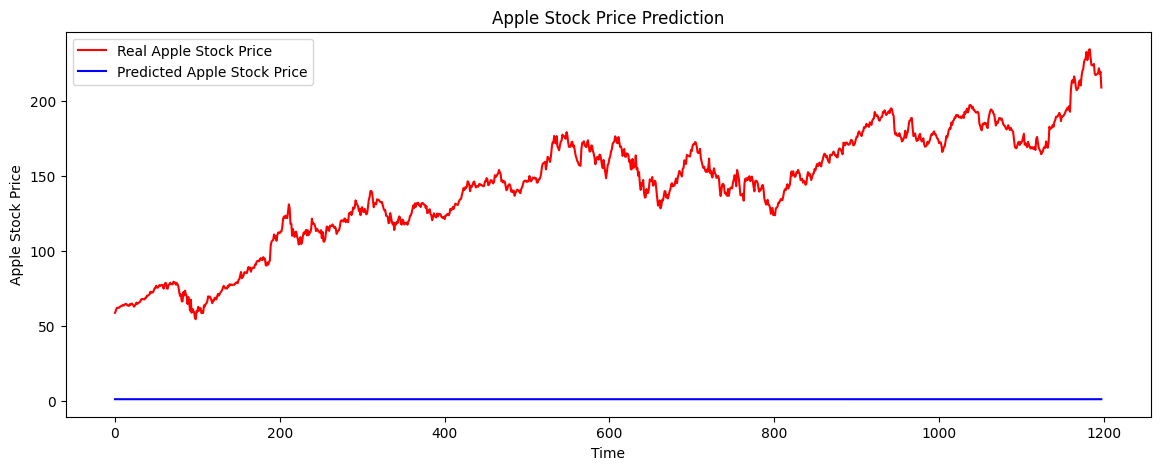

In [28]:
appletest = Appletestdf.iloc[:, 4:5].values  # Assuming the 'Close' price is the target
inputClosing = appletest  # No need to redefine, just use the same name for clarity
inputClosing_scaled = scaler.transform(inputClosing)

X_test = []
for i in range(60, len(appletest)):
    X_test.append(inputClosing_scaled[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Making predictions on the test data
y_pred = model.predict(X_test)
predicted = scaler.inverse_transform(y_pred)

# Plotting the results
plt.figure(figsize=(14, 5))
plt.plot(appletest[60:], color='red', label='Real Apple Stock Price')
plt.plot(predicted, color='blue', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In [31]:
mse = mean_squared_error(appletest[60:], predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(appletest[60:], predicted)
r2 = r2_score(appletest[60:], predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2) Score: {r2}")


Mean Squared Error (MSE): 21487.068329905418
Root Mean Squared Error (RMSE): 146.5846797244017
Mean Absolute Error (MAE): 141.36883961119517
R-squared (R2) Score: -13.307941095594156


In [ ]:
# Getting Worse

In [34]:
# Next Attempt
from tensorflow.keras.optimizers import Adam
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.3))
model.add(LSTM(units=50))
model.add(Dropout(0.3))
model.add(Dense(units=1, kernel_regularizer='l2'))

optimizer=Adam(learning_rate=.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')


# Train the model
model.fit(X_train, Y_train, epochs=50, batch_size=16)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0761
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0227
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 0.0176
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0146
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0114
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0085
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0072
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0064
Epoch 9/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - loss: 0.0059
Epoch 10/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.0054
Epoch 11/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - loss: 0.0045
Epoch 12/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 0.0049
Epoch 13/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 0.0043
Epoch 14/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0040
Epoch 15/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.0036
Epoch 16/50
75/

In [8]:
#With Tutor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

# Assuming X_train, Y_train, X_test, Y_test are already defined
# If not, you need to preprocess your data first

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
Y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1))
Y_test_scaled = scaler.transform(y_test.reshape(-1, 1))

# Build the improved model
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], 1), activation='relu', recurrent_dropout=0.2),
    BatchNormalization(),
    LSTM(100, return_sequences=True, activation='relu', recurrent_dropout=0.2),
    BatchNormalization(),
    LSTM(100, activation='relu', recurrent_dropout=0.2),
    BatchNormalization(),
    Dense(50, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(1)
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model
history = model.fit(
    X_train, Y_train_scaled,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Make predictions
Y_pred_scaled = model.predict(X_test)
Y_pred = scaler.inverse_transform(Y_pred_scaled)

# Calculate metrics
mse = mean_squared_error(y_test, Y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, Y_pred)
r2 = r2_score(y_test, Y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2) Score: {r2}")

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot predictions vs actual
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(Y_pred, label='Predicted', color='red')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Plot prediction error
plt.figure(figsize=(12, 6))
error = y_test - Y_pred
plt.plot(error, label='Prediction Error')
plt.title('Prediction Error Over Time')
plt.xlabel('Time')
plt.ylabel('Error')
plt.axhline(y=0, color='r', linestyle='--')
plt.legend()
plt.show()

# Scatter plot of predicted vs actual values
plt.figure(figsize=(10, 10))
plt.scatter(y_test, Y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Stock Prices')
plt.show()

# Distribution of prediction errors
plt.figure(figsize=(12, 6))
plt.hist(error, bins=50)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 20s 192ms/step - loss: 2.0313 - val_loss: 0.7176 - learning_rate: 0.0010
Epoch 2/200
67/67 ━━━━━━━━━━━━━━━━━━━━ 13s 191ms/step - loss: 1.3703 - val_loss: 0.6825 - learning_rate: 0.0010
Epoch 3/200
67/67 ━━━━━━━━━━━━━━━━━━━━ 20s 183ms/step - loss: 1.0446 - val_loss: 0.6631 - learning_rate: 0.0010
Epoch 4/200
67/67 ━━━━━━━━━━━━━━━━━━━━ 21s 192ms/step - loss: 0.8321 - val_loss: 0.6145 - learning_rate: 0.0010
Epoch 5/200
67/67 ━━━━━━━━━━━━━━━━━━━━ 11s 167ms/step - loss: 0.7587 - val_loss: 0.5692 - learning_rate: 0.0010
Epoch 6/200
67/67 ━━━━━━━━━━━━━━━━━━━━ 22s 188ms/step - loss: 0.6431 - val_loss: 0.5325 - learning_rate: 0.0010
Epoch 7/200
67/67 ━━━━━━━━━━━━━━━━━━━━ 20s 179ms/step - loss: 0.5396 - val_loss: 0.5047 - learning_rate: 0.0010
Epoch 8/200
67/67 ━━━━━━━━━━━━━━━━━━━━ 21s 187ms/step - loss: 0.4960 - val_loss: 0.4879 - learning_rate: 0.0010
Epoch 9/200
67/67 ━━━━━━━━━━━━━━━━━━━━ 20s 177ms/step - loss: 0.4676 - val_loss: 0.4447 - learning_rate: 0.0010
Epoc

NameError: name 'Y_test' is not defined

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


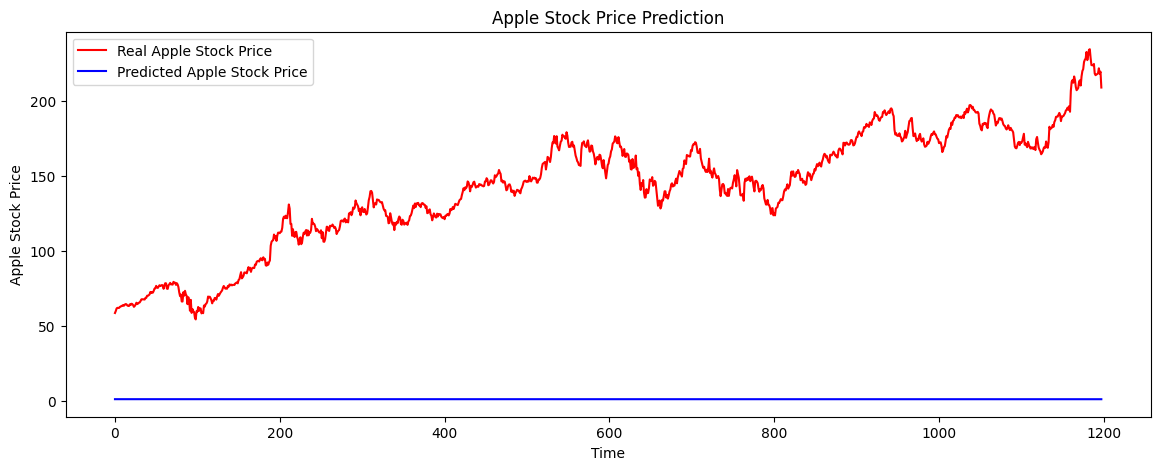

In [35]:
appletest = Appletestdf.iloc[:, 4:5].values  # Assuming the 'Close' price is the target
inputClosing = appletest  # No need to redefine, just use the same name for clarity
inputClosing_scaled = scaler.transform(inputClosing)

X_test = []
for i in range(60, len(appletest)):
    X_test.append(inputClosing_scaled[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Making predictions on the test data
y_pred = model.predict(X_test)
predicted = scaler.inverse_transform(y_pred)

# Plotting the results
plt.figure(figsize=(14, 5))
plt.plot(appletest[60:], color='red', label='Real Apple Stock Price')
plt.plot(predicted, color='blue', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In [36]:
mse = mean_squared_error(appletest[60:], predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(appletest[60:], predicted)
r2 = r2_score(appletest[60:], predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 21442.160377045842
Root Mean Squared Error (RMSE): 146.43141868139446
Mean Absolute Error (MAE): 141.2087902446621
R-squared (R2) Score: -13.278037511988746


In [38]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
model = Sequential()
model.add(LSTM(units=150, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.4))
model.add(LSTM(units=150))
model.add(Dropout(0.4))
model.add(Dense(units=1, kernel_regularizer='l2'))

optimizer=Adam(learning_rate=.005)
model.compile(optimizer=optimizer, loss='mean_squared_error')


# Train the model
model.fit(X_train, Y_train, epochs=50, batch_size=16,validation_split=0.2, callbacks=[early_stopping])


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 15s 172ms/step - loss: 0.0316 - val_loss: 0.0061
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 22s 190ms/step - loss: 0.0056 - val_loss: 0.0240
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 21s 190ms/step - loss: 0.0057 - val_loss: 0.0080
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 191ms/step - loss: 0.0038 - val_loss: 0.0054
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 21s 205ms/step - loss: 0.0038 - val_loss: 0.0079
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 189ms/step - loss: 0.0025 - val_loss: 0.0038
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 190ms/step - loss: 0.0025 - val_loss: 0.0028
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 21s 190ms/step - loss: 0.0023 - val_loss: 0.0033
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 190ms/step - loss: 0.0035 - val_loss: 0.0032
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 19s 164ms/step - loss: 0.0021 - val_loss: 0.0035
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 175ms/step - loss: 0.0024 - val_loss: 0.0031
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 21s 191ms/ste

In [39]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.4))
model.add(LSTM(units=50))
model.add(Dropout(0.4))
model.add(Dense(units=1, kernel_regularizer='l2'))

optimizer=Adam(learning_rate=.005)
model.compile(optimizer=optimizer, loss='mean_squared_error')


# Train the model
model.fit(X_train, Y_train, epochs=100, batch_size=32,validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - loss: 0.0354 - val_loss: 0.0196
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0117 - val_loss: 0.0085
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 0.0070 - val_loss: 0.0087
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 0.0065 - val_loss: 0.0139
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0048 - val_loss: 0.0061
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0034 - val_loss: 0.0049
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - loss: 0.0037 - val_loss: 0.0094
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 0.0030 - val_loss: 0.0112
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 0.0033 - val_loss: 0.0056
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0032 - val_loss: 0.0152


In [40]:
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100))

model.add(Dropout(0.2))
model.add(Dense(units=1))


# Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Optimizer with learning rate
optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train with validation split
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stop])

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 159ms/step - loss: 0.0347 - val_loss: 0.0056
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 152ms/step - loss: 0.0027 - val_loss: 0.0055
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 189ms/step - loss: 0.0020 - val_loss: 0.0049
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 156ms/step - loss: 0.0022 - val_loss: 0.0047
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 167ms/step - loss: 0.0021 - val_loss: 0.0071
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 142ms/step - loss: 0.0020 - val_loss: 0.0043
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 203ms/step - loss: 0.0018 - val_loss: 0.0053
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 143ms/step - loss: 0.0019 - val_loss: 0.0039
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 202ms/step - loss: 0.0016 - val_loss: 0.0036
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 144ms/step - loss: 0.0015 - val_loss: 0.0032
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 186ms/step - loss: 0.0018 - val_loss: 0.0055
Epoch 12/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 

38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step


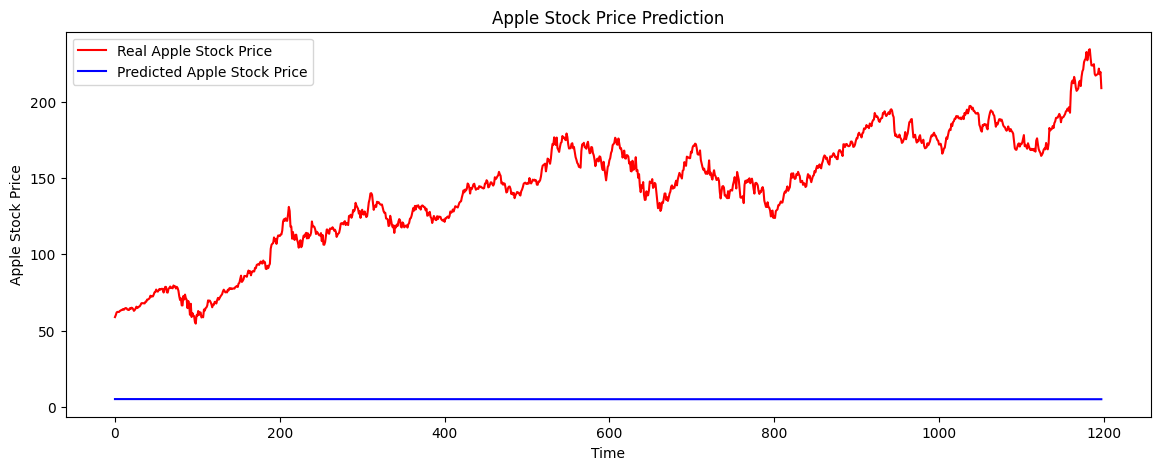

In [41]:
appletest = Appletestdf.iloc[:, 4:5].values  # Assuming the 'Close' price is the target
inputClosing = appletest  # No need to redefine, just use the same name for clarity
inputClosing_scaled = scaler.transform(inputClosing)

X_test = []
for i in range(60, len(appletest)):
    X_test.append(inputClosing_scaled[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Making predictions on the test data
y_pred = model.predict(X_test)
predicted = scaler.inverse_transform(y_pred)

# Plotting the results
plt.figure(figsize=(14, 5))
plt.plot(appletest[60:], color='red', label='Real Apple Stock Price')
plt.plot(predicted, color='blue', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In [42]:
mse = mean_squared_error(appletest[60:], predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(appletest[60:], predicted)
r2 = r2_score(appletest[60:], predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 20442.787429901677
Root Mean Squared Error (RMSE): 142.9782760768281
Mean Absolute Error (MAE): 137.61930621167852
R-squared (R2) Score: -12.612568912888703


In [45]:
X_train= []
Y_train= []
for i in range(365,1258):
    X_train.append(appletrain[i-365:i,0])
    Y_train.append(appletrain[i,0])
X_train,Y_train=np.array(X_train),np.array(Y_train)

model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))  # Adjust units
model.add(Dropout(.1))  # Adjust dropout rate
model.add(LSTM(units=100, return_sequences=True))  # Adjust units
model.add(Dropout(.2))  # Adjust dropout rate
model.add(LSTM(units=100))  # Adjust units
model.add(Dropout(.3))  # Adjust dropout rate
model.add(Dense(units=1))

# Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Optimizer with learning rate
optimizer = Adam(learning_rate=.01)  # Adjust learning rate

model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train with validation split
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stop])


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - loss: 0.1996 - val_loss: 0.0140
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 22s 965ms/step - loss: 0.0107 - val_loss: 0.0043
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 23s 982ms/step - loss: 0.0043 - val_loss: 0.0039
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - loss: 0.0036 - val_loss: 0.0028
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 40s 948ms/step - loss: 0.0034 - val_loss: 0.0025
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 40s 925ms/step - loss: 0.0032 - val_loss: 0.0041
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 19s 848ms/step - loss: 0.0032 - val_loss: 0.0036
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 22s 933ms/step - loss: 0.0032 - val_loss: 0.0034
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 41s 932ms/step - loss: 0.0027 - val_loss: 0.0021
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 20s 867ms/step - loss: 0.0021 - val_loss: 0.0019
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 22s 924ms/step - loss: 0.0023 - val_loss: 0.0025
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 19s 836m

38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 128ms/step


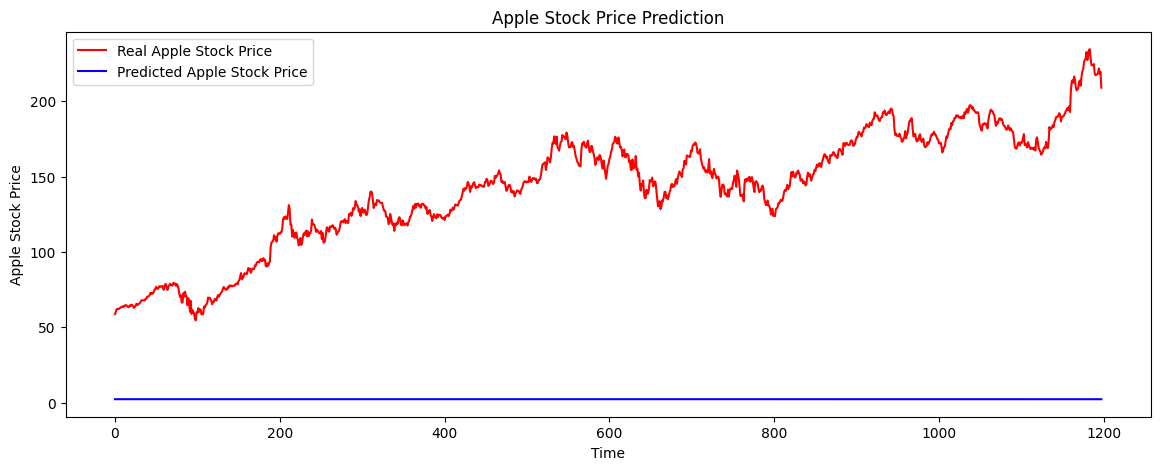

In [46]:
appletest = Appletestdf.iloc[:, 4:5].values  # Assuming the 'Close' price is the target
inputClosing = appletest  # No need to redefine, just use the same name for clarity
inputClosing_scaled = scaler.transform(inputClosing)

X_test = []
for i in range(60, len(appletest)):
    X_test.append(inputClosing_scaled[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Making predictions on the test data
y_pred = model.predict(X_test)
predicted = scaler.inverse_transform(y_pred)

# Plotting the results
plt.figure(figsize=(14, 5))
plt.plot(appletest[60:], color='red', label='Real Apple Stock Price')
plt.plot(predicted, color='blue', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In [47]:
mse = mean_squared_error(appletest[60:], predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(appletest[60:], predicted)
r2 = r2_score(appletest[60:], predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 21181.228061845137
Root Mean Squared Error (RMSE): 145.5377204089893
Mean Absolute Error (MAE): 140.28216527300407
R-squared (R2) Score: -13.104286298537604


In [48]:
model = Sequential()
model.add(LSTM(units=75, return_sequences=True, input_shape=(X_train.shape[1], 1)))  # Adjust units
model.add(Dropout(.1))  # Adjust dropout rate
model.add(LSTM(units=75, return_sequences=True))  # Adjust units
model.add(Dropout(.2))  # Adjust dropout rate
model.add(LSTM(units=75))  # Adjust units
model.add(Dropout(.3))  # Adjust dropout rate
model.add(Dense(units=1))

# Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Optimizer with learning rate
optimizer = Adam(learning_rate=.01)  # Adjust learning rate

model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train with validation split
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stop])

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 24s 817ms/step - loss: 0.2667 - val_loss: 0.0143
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 18s 745ms/step - loss: 0.0083 - val_loss: 0.0104
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 23s 845ms/step - loss: 0.0067 - val_loss: 0.0115
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 18s 747ms/step - loss: 0.0065 - val_loss: 0.0040
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 22s 797ms/step - loss: 0.0036 - val_loss: 0.0037
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 20s 851ms/step - loss: 0.0051 - val_loss: 0.0041
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 18s 755ms/step - loss: 0.0037 - val_loss: 0.0033
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 17s 754ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 18s 792ms/step - loss: 0.0033 - val_loss: 0.0030
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 20s 749ms/step - loss: 0.0027 - val_loss: 0.0028
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 22s 797ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 20

28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 382ms/step


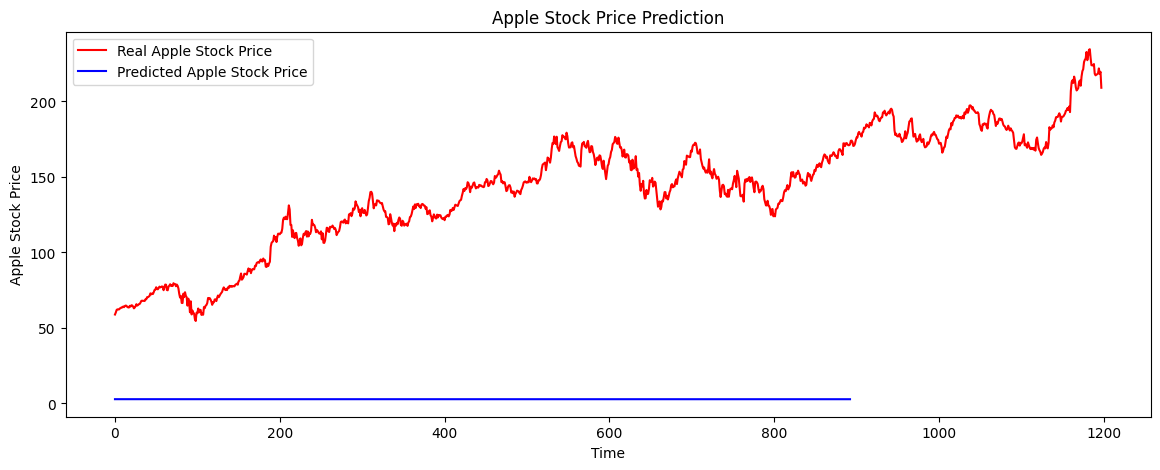

In [49]:
appletest = Appletestdf.iloc[:, 4:5].values  # Assuming the 'Close' price is the target
inputClosing = appletest  # No need to redefine, just use the same name for clarity
inputClosing_scaled = scaler.transform(inputClosing)

X_test = []
for i in range(365, len(appletest)):
    X_test.append(inputClosing_scaled[i-365:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Making predictions on the test data
y_pred = model.predict(X_test)
predicted = scaler.inverse_transform(y_pred)

# Plotting the results
plt.figure(figsize=(14, 5))
plt.plot(appletest[365:], color='red', label='Real Apple Stock Price')
plt.plot(predicted, color='blue', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In [50]:
mse = mean_squared_error(appletest[365:], predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(appletest[365:], predicted)
r2 = r2_score(appletest[365:], predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 25472.644559170265
Root Mean Squared Error (RMSE): 159.60151803529396
Mean Absolute Error (MAE): 157.79198969625278
R-squared (R2) Score: -43.36979237965617
